In [372]:
import numpy as np
from numpy import exp, log
from matplotlib import pyplot as plt

#note that python log(x) default = ln(x) 

In [373]:

ln2 = log(2)

def f(x):
    return (exp(6*x) + 3*ln2*ln2*exp(2*x) - 3*ln2*exp(4*x) - ln2*ln2*ln2) #3 same roots

def fp(x):
    return (6*exp(6*x) + 6*ln2*ln2*exp(2*x) - 12*ln2*exp(4*x))

def fpp(x):
    return (36*exp(6*x) + 12*ln2*ln2*exp(2*x) - 48*ln2*exp(4*x))
    

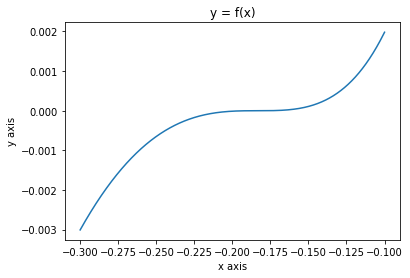

In [374]:
x = np.arange(-0.3,-0.1, 0.00001) #(-20,0) #(-1.0, 0.1) #-.3 -.1
y = f(x)
plt.title("y = f(x)") 
plt.xlabel("x axis") 
plt.ylabel("y axis") 
plt.plot(x,y)
plt.show()

In [375]:
eps = 1e-5
x0 = -0.3

In [376]:
#Newton's method
def newton(x0, f, fp, eps, M = 50):
    
    x1 = x0 + eps + 1000
    for R in range(0, M+1):
        if(abs(x1-x0) < eps):
            print("converge within {} rounds".format(R))
            return x0
        #if(abs(f(x0)) < eps): print("converge within {} rounds".format(R))
        #if(abs(fp(x0)) < 1e-9):print("zero gradient, can't converge")
        #thx teacher for clarifying 
        x1 = x0 - f(x0)/fp(x0)
        print("round {} | sol {} | f(sol) {}".format(R+1, x1, f(x1)))
        x0, x1 = x1, x0 #bug with x0 = x1

    print("doesn't converge to solution within eps = {}, MaxIter = {}".format(eps, M))
    
    return x0, R

In [377]:
newton(x0, f, fp, eps) #0.6, -0.6

round 1 | sol -0.2561672484773413 | f(sol) -0.0008319584499118515
round 2 | sol -0.2300022925892785 | f(sol) -0.00023679098213796879
round 3 | sol -0.21366871741953886 | f(sol) -6.843677555951055e-05
round 4 | sol -0.20321664959503466 | f(sol) -1.9959104397726524e-05
round 5 | sol -0.19642866514683494 | f(sol) -5.853527024368699e-06
round 6 | sol -0.19197958328975814 | f(sol) -1.7227952653908751e-06
round 7 | sol -0.18904636318221163 | f(sol) -5.082108354703685e-07
round 8 | sol -0.1871051779688435 | f(sol) -1.5014238835542315e-07
round 9 | sol -0.18581732184060867 | f(sol) -4.4400676524336546e-08
round 10 | sol -0.18496151158512897 | f(sol) -1.3138865495587737e-08
round 11 | sol -0.18439219098163706 | f(sol) -3.889672195445115e-09
round 12 | sol -0.1840131838051452 | f(sol) -1.151840345325894e-09
round 13 | sol -0.18376075164524447 | f(sol) -3.4115671398993186e-10
round 14 | sol -0.18359256974333474 | f(sol) -1.0105799530535364e-10
round 15 | sol -0.18348049558999 | f(sol) -2.99381075

-0.18327610606978667

In [378]:
#Modified Newton's method
def modified_newton(x0, f, fp, fpp, eps, M = 50):
    x1 = x0 + eps + 1000
    for R in range(0, M):
        if(abs(x1-x0) < eps):
            print("converge within {} rounds".format(R))
            return x0
        x1 = x0 - (f(x0)*fp(x0))/(fp(x0)*fp(x0)-f(x0)*fpp(x0))
        print("round {} | sol {} | f(sol) {}".format(R+1, x1, f(x1))) #+1 because after x1 = blablabla
        x0, x1 = x1, x0

    print("doesn't converge to solution within eps = {}, MaxIter = {}".format(eps, M))
    return x0, R


In [379]:
#modified newton's method is a lot faster then newton's method
modified_newton(x0, f, fp, fpp, eps) 

round 1 | sol -0.19588391288750334 | f(sol) -5.165306968202277e-06
round 2 | sol -0.1834145789615947 | f(sol) -1.0527079208344503e-11
round 3 | sol -0.18325648740664252 | f(sol) -5.551115123125783e-17
round 4 | sol -0.18325650072571673 | f(sol) 5.551115123125783e-17
converge within 4 rounds


-0.18325650072571673

In [380]:
#SOR Newton's Method
def SOR_newton(x0, f, fp, m, eps, M = 50):
    x1 = x0 + eps + 1000
    for R in range(0, M+1):
        if(abs(x1-x0) < eps):
            #print("converge within {} rounds".format(R))
            return x0, R
        x1 = x0 - m*f(x0)/fp(x0)
        #print("round {} | sol {} | f(sol) {}".format(R, x1, f(x1)))
        x0, x1 = x1, x0
    return x0, M

In [381]:
def SOR_test(x0 = x0):
    for m in range(1, 5):
        M = 20
        x, r = SOR_newton(x0, f, fp, m, eps, M) #0.6 -0.6 -0.5
        if(r == M): print("m = {}, exceed round = {}, sol = {}, f(sol) = {}".format(m, M, x, f(x)))
        else: print("m = {}, round = {}, sol = {}, f(sol) = {}".format(m, r, x, f(x)))
        

In [382]:
#we can see that F may have 3 same roots by SOR newton's method
SOR_test(-0.4) #.32 .35div0

m = 1, exceed round = 20, sol = -0.18328791733890556, f(sol) = -8.287814878826794e-14
m = 2, round = 9, sol = -0.18326120623737696, f(sol) = -4.996003610813204e-16
m = 3, round = 4, sol = -0.1832565199202848, f(sol) = -1.6653345369377348e-16
m = 4, round = 11, sol = -0.18325581638868868, f(sol) = -5.551115123125783e-17
